<a href="https://colab.research.google.com/github/aswinudhesh/Naan-Mudhalvan-Project/blob/main/Medical_Imaging_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - accuracy: 0.3442 - loss: 2.5887 - val_accuracy: 0.2969 - val_loss: 1.1300
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.2188 - loss: 1.2203 - val_accuracy: 0.0000e+00 - val_loss: 1.1358
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.4709 - loss: 1.0607 - val_accuracy: 0.6875 - val_loss: 0.8722
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7188 - loss: 0.8501 - val_accuracy: 0.5000 - val_loss: 0.8948
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - accuracy: 0.6021 - loss: 0.8132 - val_accuracy: 0.9375 - val_loss: 0.5049
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8438 - loss: 0.6056 - val_accuracy: 1.0000 - val_loss: 0.4674
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - accuracy: 0.7838 - loss: 0.5423 - val_accuracy: 0.9375 - val_loss: 0.3251
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8125 - loss: 0.6029 - val_accuracy: 1.0000 - val_loss: 0.3311


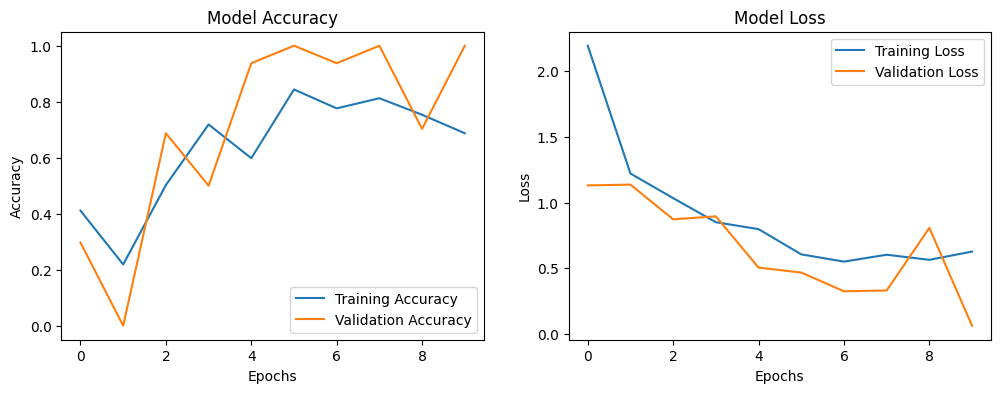

In [23]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define paths to train and test directories in Google Drive
train_dir = '/content/drive/MyDrive/Data set/Covid19-dataset/train'
test_dir = '/content/drive/MyDrive/Data set/Covid19-dataset/test'

# Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Data Preprocessing and Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for test set

# Load Training Data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

# Load Validation Data
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Define the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(3, activation='softmax')  # Output layer for multi-class classification
])

# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

# Evaluate the Model on Validation Data
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Plot Training and Validation Accuracy and Loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()



In [26]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to make a prediction on a new image
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Expand dims to match the input shape

    prediction = model.predict(img_array)
    class_indices = {v: k for k, v in train_generator.class_indices.items()}
    predicted_class = class_indices[np.argmax(prediction)]
    confidence = np.max(prediction) * 100

    print(f"Predicted class: {predicted_class}")
    print(f"Confidence: {confidence:.2f}%")

# Usage: Replace 'path_to_your_image.jpg' with the actual image path you want to test.
predict_image('/content/drive/MyDrive/096.png')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Predicted class: Covid
Confidence: 64.84%
